In [88]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression

C:\Users\user\AppData\Local\Temp\ipykernel_18892\4179474864.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

TODO:

* Degree distribution [feito]
* Power law fit [feito]
* Transitivity [feito]

* Rank nodes by
    * Betwenness centrality [feito]
    * Closeness centrality [feito]
    * Clustering coefficient [feito]
    * Pagerank [feito]
    * Community detection [feito]
    * gtries + 500 random network [feito]



# Network init

* **G** is the network with nodes labeled from 1 to 34. This format will be useful for working with *gTries*.
* **H** is the same network with node labels replaced with the actual species/species group. It allows for easier interpretation of the results.
* weighted/unweighted comparisons can be done with the same network (typically **H**) as long as the 'weight' parameter is kept in check.

In [78]:
rede = pd.read_csv('project_nw.csv', delimiter= ';', header= None)
rede = pd.DataFrame.to_numpy(rede)
G = nx.from_numpy_matrix(rede, create_using= nx.DiGraph)

# adjust nodes for gtries:
mapping = {i: i+1 for i in range(0,34)}
G = nx.relabel_nodes(G, mapping, copy=True)

# fancy labels:
labels =  {1: 'Seabirds',
           2: 'Minkle_whale',
           3: 'Common_dolphin',
           4: 'Striped_dolphin',
           5: 'Bottlenose_dolphin',
           6: 'Harbor_porpoise',
           7: 'Tunas',
           8: 'Rays',
           9: 'Hake',
           10: 'Squids',
           11: 'Benthic_cephalopods',
           12: 'Horse_mackerel',
           13: 'Blue_jack_mackerel',
           14: 'Chub_mackerel',
           15: 'Mackerel',
           16: 'Demersal_piscivorous_fish',
           17: 'Demersal_invertivorous_fish',
           18: 'Benthopelagic_piscivorous_fish',
           19: 'Benthopelagic_invertivorous_fish',
           20: 'Flatfish',
           21: 'Sparids',
           22: 'Anchovy',
           23: 'Sardine',
           24: 'Bogue',
           25: 'Henslows_crab',
           26: 'Shrimps',
           27: 'Macrozoobenthos',
           28: 'Suprabenthic_invertebrates',
           29: 'Macrozooplankton',
           30: 'Meso_and_Microzooplankton',
           31: 'Phytoplankton',
           32: 'Discards',
           33: 'Detritus',
           34: 'Import'}

H = nx.relabel_nodes(G, labels, copy=True)

In [85]:
rede

array([[0.   , 0.   , 0.   , ..., 0.01 , 0.   , 0.018],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.066],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

Enumerating the edges and respective weights:

In [4]:
G.edges(data = True)

OutEdgeDataView([(1, 9, {'weight': 0.1}), (1, 10, {'weight': 0.01}), (1, 12, {'weight': 0.013999999999999999}), (1, 14, {'weight': 0.126}), (1, 15, {'weight': 0.25}), (1, 17, {'weight': 0.122}), (1, 19, {'weight': 0.078}), (1, 22, {'weight': 0.019}), (1, 23, {'weight': 0.253}), (1, 32, {'weight': 0.01}), (1, 34, {'weight': 0.018000000000000002}), (2, 12, {'weight': 0.2552}), (2, 13, {'weight': 0.0888}), (2, 14, {'weight': 0.10800000000000001}), (2, 15, {'weight': 0.002}), (2, 19, {'weight': 0.021}), (2, 21, {'weight': 0.062}), (2, 22, {'weight': 0.04}), (2, 23, {'weight': 0.35700000000000004}), (2, 34, {'weight': 0.066}), (3, 9, {'weight': 0.042}), (3, 10, {'weight': 0.047}), (3, 11, {'weight': 0.008}), (3, 12, {'weight': 0.13}), (3, 13, {'weight': 0.025}), (3, 14, {'weight': 0.233}), (3, 15, {'weight': 0.047}), (3, 17, {'weight': 0.002}), (3, 18, {'weight': 0.001}), (3, 19, {'weight': 0.057}), (3, 20, {'weight': 0.003}), (3, 22, {'weight': 0.006999999999999999}), (3, 23, {'weight': 0.

# Network Viz

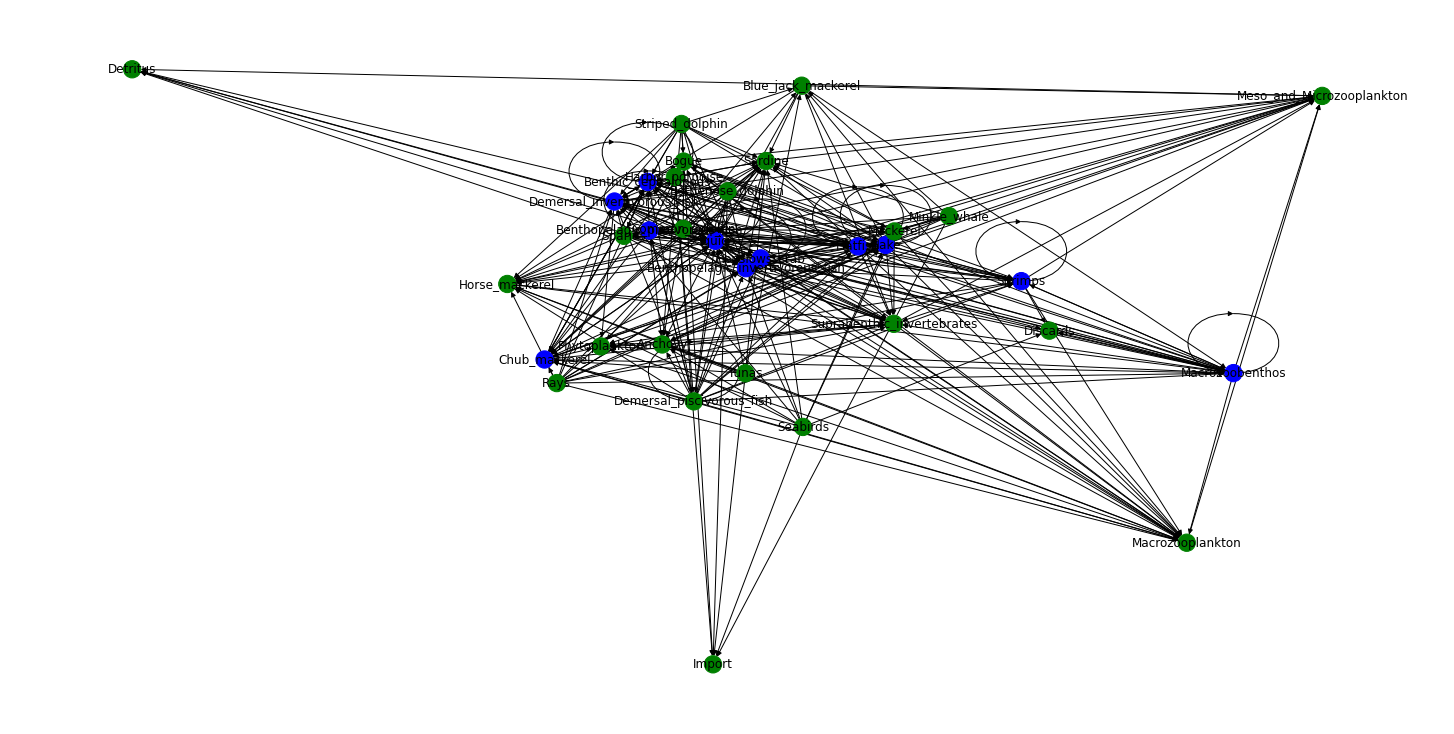

In [5]:
d = nx.betweenness_centrality(H, weight=None)
color = ['blue' if i>0.01 else 'green' for i in d.values()]

pos = nx.kamada_kawai_layout(H)
nx.draw(H, pos = pos, node_color = color, with_labels=True)

In [ ]:
nx.write_gexf(H, "rede_gephi.gexf", version="1.2draft")

# Connectivity

In [69]:
print(f'is the undirected version of G fully connected? {nx.is_connected(G.to_undirected())}')
print(f'is G strongly connected? {nx.is_strongly_connected(G)}')
print(f'is G weakly connected? {nx.is_weakly_connected(G)}')
print(f'number of weakly connected components: {nx.number_weakly_connected_components(G)}')

is the undirected version of G fully connected? True
is G strongly connected? False
is G weakly connected? True
number of weakly connected components: 1


# Distance Metrics

In [56]:
dist = dict(nx.all_pairs_shortest_path_length(G))

# sum of all shortest distances in the network:
res = 0
for item in dist:
    #print(dist[item])
    #print(dist[item].values())
    h = sum(dist[item].values())
    res += h

print(f"sum of all non-infinite distances:{res}")
print(f"average non-infinite path length:{res/(34*33)}")

sum of all non-infinite distances:973
average non-infinite path length:0.8672014260249554


In [54]:
#print(f"The diameter of this network is {nx.diameter(G)}")
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
diameter_w = max([max(j.values()) for (i,j) in nx.shortest_path_length(G, weight='weight')])
print(f"The diameter of this network is {diameter}")
print(f"The weighted diameter of this network is {diameter_w}")
print(f"average shortest path length is {nx.average_shortest_path_length(G, weight=None)}")
print(f"average shortest path length with weights is {nx.average_shortest_path_length(G, weight='weight')}")

The diameter of this network is 5
The weighted diameter of this network is 0.95
average shortest path length is 0.8672014260249554
average shortest path length with weights is 0.021508021390374336


In [72]:
nx.shortest_path(G,2,16)

nx.shortest_path(H, 'Minkle_whale', 'Demersal_piscivorous_fish')

['Minkle_whale',
 'Horse_mackerel',
 'Squids',
 'Hake',
 'Benthopelagic_piscivorous_fish',
 'Demersal_piscivorous_fish']

In [ ]:
dict(nx.all_pairs_dijkstra(G, weight = 'weight'))

# Degree Distribution

Degree of each node: [(1, 11), (2, 9), (3, 14), (4, 13), (5, 13), (6, 12), (7, 7), (8, 14), (9, 25), (10, 35), (11, 26), (12, 16), (13, 12), (14, 23), (15, 14), (16, 22), (17, 26), (18, 20), (19, 26), (20, 22), (21, 13), (22, 14), (23, 21), (24, 13), (25, 16), (26, 21), (27, 24), (28, 23), (29, 21), (30, 17), (31, 9), (32, 4), (33, 6), (34, 6)]


Text(0, 0.5, 'Frequency')

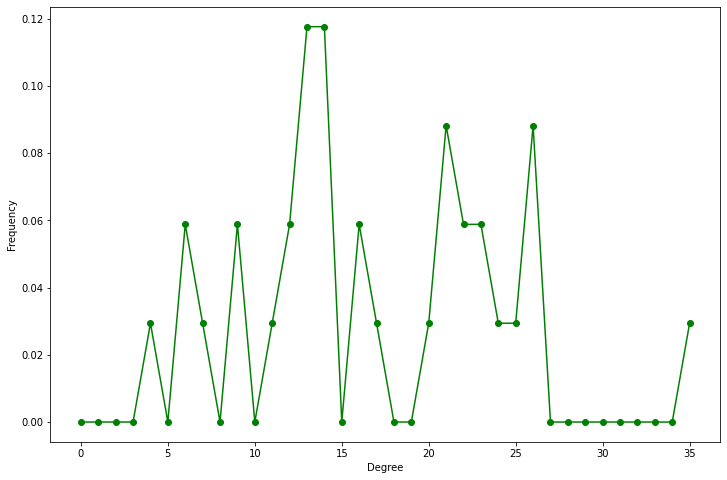

In [16]:
print(f"Degree of each node: {nx.degree(G)}")

degree_freq = nx.degree_histogram(G)
degree_norm = []
for i in degree_freq:
    degree_norm.append(i/sum(degree_freq))

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.plot(degrees, degree_norm,'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [42]:
graus = pd.DataFrame({'node': pd.Series(dtype='str'),
                      'group': pd.Series(dtype='str'),
                      'degree': pd.Series(dtype='int'),
                      'in_degree': pd.Series(dtype='int'),
                      'out_degree': pd.Series(dtype='int')})

graus['node'] = G.nodes
graus['group'] = H.nodes
graus['degree'] = [k[1] for k in G.degree]
graus['in_degree'] = [k[1] for k in G.in_degree]
graus['out_degree'] = [k[1] for k in G.out_degree]

In [142]:
with open('outputs/degrees.tex','w') as tf:
    tf.write(graus.to_latex(index=False))

graus

,node,group,degree,in_degree,out_degree
1,1,Seabirds,11,0,11
2,2,Minkle_whale,9,0,9
3,3,Common_dolphin,14,0,14
4,4,Striped_dolphin,13,0,13
5,5,Bottlenose_dolphin,13,0,13
6,6,Harbor_porpoise,12,0,12
7,7,Tunas,7,0,7
8,8,Rays,14,0,14
9,9,Hake,25,11,14
10,10,Squids,35,19,16


[{'Seabirds','Minkle_whale','Common_dolphin','Striped_dolphin', 'Bottlenose_dolphin', 'Harbor_porpoise', 'Tunas', 'Rays'},
 {'Phytoplankton','Discards','Detritus','Import'},
 {'Hake','Squids','Benthic_cephalopods','Horse_mackerel','Blue_jack_mackerel','Chub_mackerel','Mackerel','Demersal_piscivorous_fish','Demersal_invertivorous_fish','Benthopelagic_piscivorous_fish',
  'Benthopelagic_invertivorous_fish','Flatfish','Sparids','Anchovy','Sardine','Bogue','Henslows_crab','Shrimps','Shrimps','Macrozoobenthos','Suprabenthic_invertebrates','Meso_and_Microzooplankton',
  'Macrozooplankton'}]

##  Degree distribution

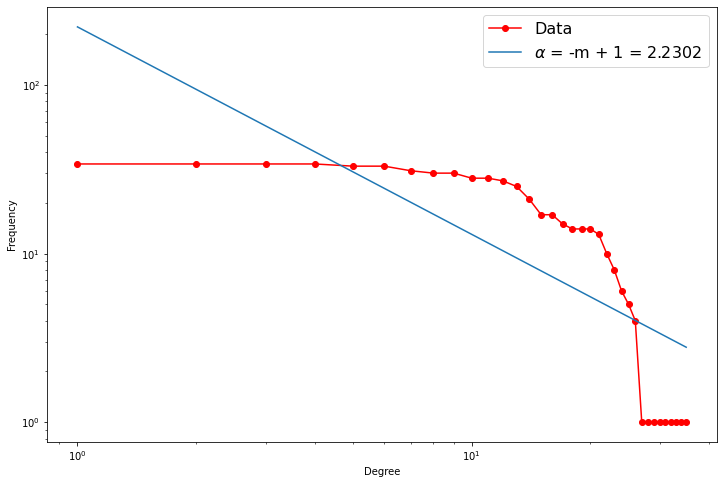

In [150]:
degree_freq = nx.degree_histogram(G)
degrees = range(1, len(degree_freq))
y = []
for i in range(1,len(degree_freq)):
    new_value = np.sum(degree_freq) - (np.cumsum(degree_freq))[i-1]
    y.append(new_value)

model = LinearRegression()
model.fit(np.array(np.log(degrees)).reshape(-1,1), np.log(y))

plt.figure(figsize=(12, 8))
plt.loglog(degrees, y,'ro-', label = 'Data')
plt.loglog(degrees,  np.exp(model.coef_*np.log(degrees) + model.intercept_), label = fr'$\alpha$ = -m + 1 = {np.round(-model.coef_,4).item()+1}')
#plt.xlim([1,70])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right', prop={'size': 16})


# Clustering Coefficient
## Unweighted

In [167]:
d = nx.clustering(H, weight=None)

cl_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'clustering_coefficient': pd.Series(dtype='float')})

cl_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cl_u['clustering_coefficient'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/clu_un.tex','w') as tf:
    tf.write(cl_u[cl_u['clustering_coefficient']>0].to_latex(index=False))

In [175]:
cl_u[cl_u['clustering_coefficient']>0]

,node,clustering_coefficient
0,Detritus,0.500000
1,Rays,0.434066
2,Sparids,0.421053
3,Flatfish,0.409574
4,Benthopelagic_piscivorous_fish,0.394040
5,Henslows_crab,0.383333
6,Phytoplankton,0.361111
7,Demersal_piscivorous_fish,0.357143
8,Benthic_cephalopods,0.349265
9,Harbor_porpoise,0.348485


## Weighted

In [168]:
d = nx.clustering(H, weight='weight')

cl_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'clustering_coefficient': pd.Series(dtype='float')})

cl_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cl_w['clustering_coefficient'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/clu_w.tex','w') as tf:
    tf.write(cl_w[cl_w['clustering_coefficient']>0].to_latex(index=False))

In [174]:
cl_w[cl_w['clustering_coefficient']>0]

,node,clustering_coefficient
0,Detritus,0.086836
1,Phytoplankton,0.040915
2,Meso_and_Microzooplankton,0.038987
3,Macrozooplankton,0.032525
4,Macrozoobenthos,0.028941
5,Shrimps,0.028635
6,Rays,0.025446
7,Suprabenthic_invertebrates,0.023182
8,Sparids,0.022603
9,Benthopelagic_invertivorous_fish,0.022601


# Betwenness Centrality:

## Unweighted network:

In [169]:
d = nx.betweenness_centrality(H, weight=None)

bc_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'betweeness_centrality': pd.Series(dtype='float')})

bc_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
bc_u['betweeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/bc_un.tex','w') as tf:
    tf.write(bc_u[bc_u['betweeness_centrality']>0].to_latex(index=False))

In [173]:
bc_u[bc_u['betweeness_centrality']>0]

,node,betweeness_centrality
0,Squids,0.110718
1,Hake,0.073885
2,Benthic_cephalopods,0.020195
3,Benthopelagic_piscivorous_fish,0.019852
4,Demersal_invertivorous_fish,0.017623
5,Macrozoobenthos,0.016453
6,Flatfish,0.015417
7,Benthopelagic_invertivorous_fish,0.012778
8,Chub_mackerel,0.011769
9,Shrimps,0.011217


## Weighted network:

In [170]:
d = nx.betweenness_centrality(H, weight='weight')

bc_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'betweeness_centrality': pd.Series(dtype='float')})

bc_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
bc_w['betweeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/bc_we.tex','w') as tf:
    tf.write(bc_w[bc_w['betweeness_centrality']>0].to_latex(index=False))

In [176]:
bc_w[bc_w['betweeness_centrality']>0]

,node,betweeness_centrality
0,Squids,0.231534
1,Hake,0.161458
2,Blue_jack_mackerel,0.039773
3,Benthic_cephalopods,0.038826
4,Benthopelagic_invertivorous_fish,0.034091
5,Demersal_invertivorous_fish,0.033144
6,Flatfish,0.029830
7,Mackerel,0.028409
8,Anchovy,0.024148
9,Benthopelagic_piscivorous_fish,0.022727


# Closeness Centrality

In [289]:
d = nx.closeness_centrality(H)

cc_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'closeness_centrality': pd.Series(dtype='float')})

cc_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cc_u['closeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/cc_un.tex','w') as tf:
    tf.write(cc_u[cc_u['closeness_centrality']>0].to_latex(index=False))

In [290]:
cc_u[cc_u['closeness_centrality']>0]

,node,closeness_centrality
0,Macrozooplankton,0.631169
1,Suprabenthic_invertebrates,0.620753
2,Meso_and_Microzooplankton,0.592671
3,Sardine,0.586667
4,Squids,0.556818
5,Phytoplankton,0.534759
6,Macrozoobenthos,0.528926
7,Demersal_invertivorous_fish,0.494949
8,Benthopelagic_invertivorous_fish,0.494949
9,Detritus,0.487013


# Pagerank
# weigth

In [295]:
d = nx.pagerank(H, weight= 'weight')

pr_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'pagerank': pd.Series(dtype='float')})

pr_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
pr_w['pagerank'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/pr_w.tex','w') as tf:
    tf.write(pr_w[pr_w['pagerank']>0].to_latex(index=False))

In [296]:
pr_w

,node,pagerank
0,Phytoplankton,0.143850
1,Meso_and_Microzooplankton,0.128281
2,Detritus,0.090720
3,Macrozooplankton,0.058699
4,Macrozoobenthos,0.053149
5,Suprabenthic_invertebrates,0.051506
6,Sardine,0.042411
7,Benthopelagic_invertivorous_fish,0.035806
8,Shrimps,0.029005
9,Demersal_invertivorous_fish,0.028086


# Unweighted

In [297]:
d = nx.pagerank(H, weight= None)

pr_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'pagerank': pd.Series(dtype='float')})

pr_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
pr_u['pagerank'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/pr_u.tex','w') as tf:
    tf.write(pr_u[pr_u['pagerank']>0].to_latex(index=False))

In [298]:
pr_u

,node,pagerank
0,Phytoplankton,0.123184
1,Meso_and_Microzooplankton,0.097845
2,Detritus,0.077292
3,Macrozooplankton,0.063477
4,Suprabenthic_invertebrates,0.052948
5,Macrozoobenthos,0.045245
6,Shrimps,0.037437
7,Squids,0.036845
8,Sardine,0.035445
9,Demersal_invertivorous_fish,0.031540


# gTries

 ./gTrieScanner -s 3 -d -m esu -g rede_fw.txt -f simple
 ./gTrieScanner -s 3 -d -m gtrie dir3.gt -g rede_fw.txt
 ./gTrieScanner -s 3 -d -m gtrie dir3.gt -g rede_fw.txt -r 500 -raw

 ./gTrieScanner -s 4 -d -m esu -g rede_fw.txt -f simple
 ./gTrieScanner -s 4 -d -m gtrie dir4.gt -g rede_fw.txt
 ./gTrieScanner -s 4 -d -m gtrie dir4.gt -g rede_fw.txt -r 500 -raw

In [87]:
with open('outputs/rede_fw.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in G.edges:
            spamwriter.writerow(item)

In [127]:
def z_norm(df):
    z_list = df[' z_score'].tolist()
    z_squared = [i**2 for i in z_list]
    normalized = [i / np.sum(z_squared)**0.5 for i in z_list]
    return normalized

types = dtype = {'adjmatrix': str,
                 'circuit1.columns': float,
                 ' z_score': float,
                 ' avg_random': float,
                 ' stdev_random': float}

## Size-3 Subgraphs:

In [180]:
nx.transitivity(G)

0.35467255334805003

In [137]:
valores = [
    ['000100100', 306, 5.97, 200.46, 17.67],
    ['001100000', 585, 4.24, 428.36 , 36.97],
    ['001100010', 82, 7.29, 32.28, 6.82],
    ['010100100', 21,-5.07,107.69, 17.09],
    ['010100110', 4 , -2.37, 11.34, 3.09],
    ['011000000',  298, 6.61,187.28,16.76],
    ['011001000', 134, 3.81, 79.07,14.41],
    ['011100000', 12,-5.69,102.31,15.88],
    ['011100010', 3,-4.44, 24.64, 4.88],
    ['011100100', 0,0 , 0.00,0.00],
    ['011101000', 2,-2.93, 10.90, 3.03],
    ['011101100', 0,0, 0.00 ,0.00],
    ['011101110', 0,0,0.00 , 0.00]]

gtrie3 = pd.DataFrame(valores, columns=['Graph',  'Org_Freq', ' z_score', 'Rnd_Avg',  'Rnd_Dev'])
gtrie3 = gtrie3.assign(z_n = z_norm(gtrie3))

with open('outputs/gtries_3_table.tex','w') as tf:
    tf.write(gtrie3.to_latex(index=False))

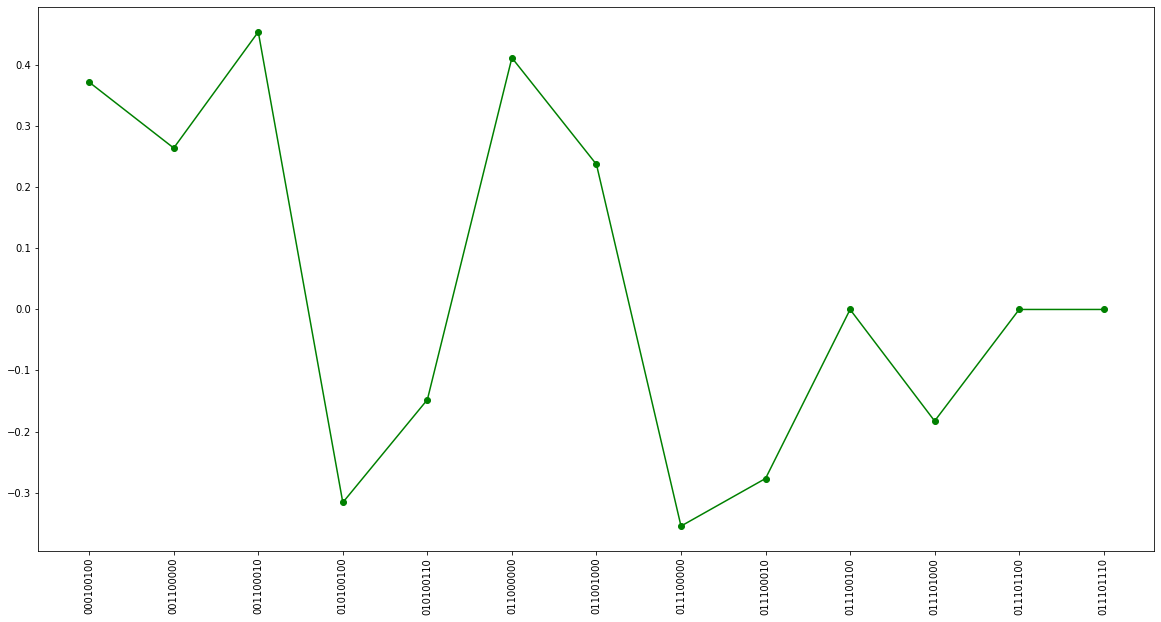

In [129]:
plt.xticks(rotation=90)
plt.plot(gtrie3['Graph'], gtrie3['z_n'], 'go-', label = 'Subgraph (n=3)')

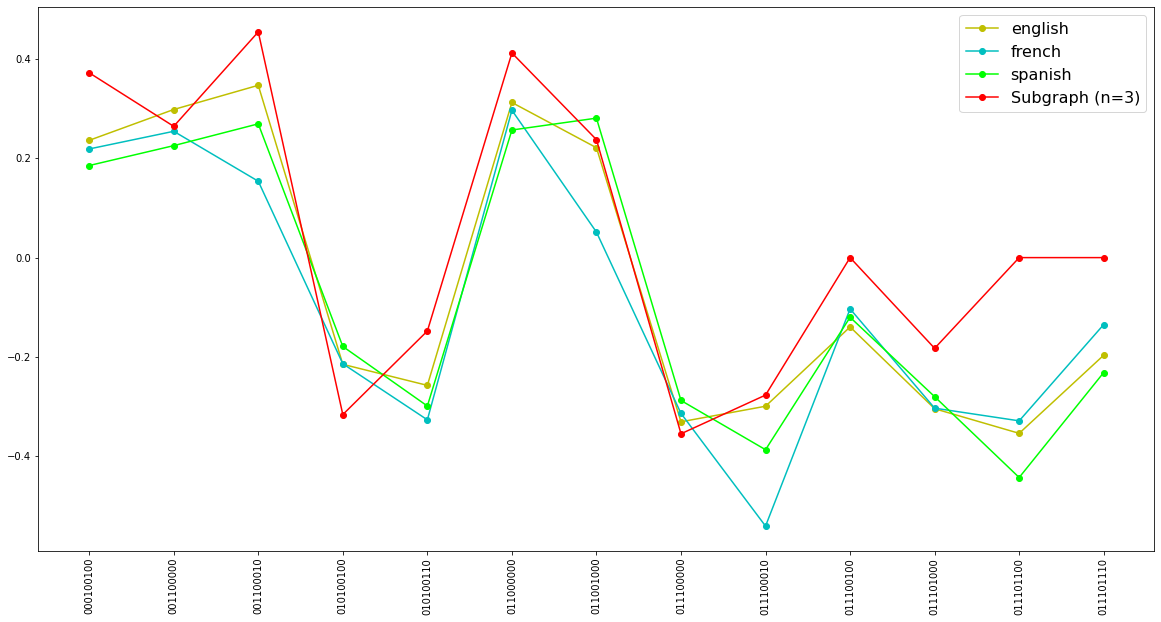

In [151]:
english = pd.read_csv('raw_english.txt', dtype = types)
english = english.assign(z_n = z_norm(english))

french = pd.read_csv('raw_french.txt', dtype = types)
french = french.assign(z_n = z_norm(french))

spanish = pd.read_csv('raw_spanish.txt', dtype = types)
spanish = spanish.assign(z_n = z_norm(spanish))

plt.xticks(rotation=90)
plt.plot(english['adjmatrix'], english['z_n'], 'yo-', label = 'english')
plt.plot(french['adjmatrix'], french['z_n'], 'co-', label = 'french')
plt.plot(spanish['adjmatrix'], spanish['z_n'], 'lime', linestyle = '-', marker = 'o', label = 'spanish')
plt.plot(gtrie3['Graph'], gtrie3['z_n'], 'ro-', label = 'Subgraph (n=3)')
plt.legend(loc='upper right', prop={'size': 16})

## Size-4 Subgraphs

In [138]:
valores_4 = [
['0011100001000100',  170 , 15.62 ,  20.91 ,9.54],
['0110000000000110',  103 , 9.64 ,  27.88 ,7.79],
['0101000111000010',   55 , 7.70  ,9.52 ,5.91],
['0111000001000100',   54 , 7.37 ,  14.08 ,5.42],
['0110000100010000',  187 , 7.21 ,  70.13,16.22],
['0101001010000000',  508 , 7.19 , 185.41,44.88],
['0011100101000000',  118 , 7.00 ,  36.23,11.67],
['0100001010001000',  517 , 6.82 , 195.95,47.10],
['0111000000000000',  264 , 6.44 , 113.58,23.34],
['0001100011000100',  116 , 6.07 ,  37.05,13.01],
['0000100110000000', 1134 , 5.55 , 671.05,83.49],
['0110000100000010',  306 , 5.39 , 139.86,30.84],
['0010100101001000',  109 , 5.31 ,  40.82,12.85],
['0111001100000000',   40 , 5.25 ,  12.57 ,5.23],
['0111001000000000',  271 , 5.17 , 130.53,27.17],
['0000100010001000',  282 , 5.17 , 144.26,26.65],
['0001100010000000',  822 , 4.96 , 464.56,72.05],
['0101000011000100',   83 , 4.75 ,  31.83,10.78],
['0011100000000000',  760 , 4.74 , 439.96,67.49],
['0111000101000000',   74 , 4.65 ,  28.21 ,9.85],
['0101000111000000',   83 , 4.58 ,  32.01,11.14],
['0111001100010000',   24 , 4.56  ,6.25 ,3.89],
['0000101010001000',  293 , 4.47 , 151.86,31.54],
['0110001000001000',  320 , 4.10 , 169.77,36.61],
['0100000011001100',   38 , 4.02 ,  14.52 ,5.85],
['0011101000000000',  255 , 3.75 , 144.81,29.39],
['0010100100000000', 1027 , 3.71 , 715.39,84.00],
['0100000110000000', 1179 , 3.50 , 829.54,99.71],
['0001101010000000',  283 , 3.34 , 165.10,35.29],
['0010101000001000',  254 , 3.23 , 153.12,31.28],
['0000100010000100', 1054 , 3.04 , 775.22,91.64],
['0111000101000010',    8 , 3.00  ,2.45 ,1.85],
['0100000110000010',   71 , 2.58 ,  42.74,10.94],
['0011101000000110',    7 , 2.36  ,2.48 ,1.91],
['0110100001011100',    4 , 0.70  ,2.65 ,1.92],
['0100100011011100',    1 , 0.06  ,0.94 ,1.02],
['0101100111000000',    5 , 0.01  ,4.97 ,2.93],
['0100100011001100',    2 ,-0.15  ,2.29 ,1.96],
['0100100011010000',   16 ,-0.24 ,  17.65 ,6.78],
['0110101000011100',    1 ,-0.35  ,1.51 ,1.45],
['0111101100000000',    1 ,-0.53  ,1.91 ,1.72],
['0101100011000010',    8 ,-0.61 ,  10.96 ,4.89],
['0110100001001110',    1 ,-0.61  ,1.93 ,1.52],
['0111101000000110',    1 ,-0.71  ,2.14 ,1.62],
['0110101000011010',    1 ,-0.87  ,2.63 ,1.87],
['0110100101011000',    1 ,-0.88  ,2.84 ,2.10],
['0100100011000010',   15 ,-1.01 ,  23.32 ,8.27],
['0100100011010010',    1 ,-1.37  ,5.12 ,3.01],
['0100100011011000',    3 ,-1.52  ,8.35 ,3.51],
['0111100101000000',    3 ,-1.56  ,9.78 ,4.36],
['0101101010010000',    3 ,-1.79  ,9.50 ,3.64],
['0111101000010000',    2 ,-1.80  ,8.60 ,3.67],
['0100101010001010',    3 ,-1.83  ,9.30 ,3.45],
['0111100001010000',    2 ,-1.84  ,8.35 ,3.45],
['0101100011000100',    2 ,-1.91 ,  10.67 ,4.55],
['0001101010001000',   22 ,-1.98 ,  40.75 ,9.46],
['0110101000010000',    6 ,-1.99 ,  21.99 ,8.04],
['0110101000001010',    1 ,-2.06  ,8.57 ,3.69],
['0100100011001010',    1 ,-2.07  ,9.62 ,4.17],
['0110101000011000',    1 ,-2.10 ,  10.92 ,4.72],
['0101101010000010',    2 ,-2.19 ,  10.91 ,4.06],
['0100100010010010',    1 ,-2.25 ,  42.63,18.51],
['0110100001001010',    1 ,-2.27  ,9.35 ,3.68],
['0110101000000010',    3 ,-2.32 ,  20.20 ,7.42],
['0100101010011000',    1 ,-2.40 ,  10.21 ,3.84],
['0100100011001000',   12 ,-2.49 ,  44.85,13.18],
['0100100010010100',   14 ,-2.50 ,  37.46 ,9.39],
['0101100011000000',    8 ,-2.51 ,  45.82,15.05],
['0101001010001000',   18 ,-2.60 ,  48.60,11.78],
['0110101000001000',    5 ,-2.66 ,  46.79,15.72],
['0111101000000000',    6 ,-2.89 ,  40.35,11.89],
['0110100001000010',   11 ,-3.00 ,  45.50,11.50],
['0110100001010000',    9 ,-3.07 ,  42.75,10.98],
['0100100110010000',    7 ,-3.49 ,  32.29 ,7.25],
['0100100010001000',   35 ,-3.54 , 116.93,23.16],
['0110100100010000',    5 ,-3.56 ,  36.20 ,8.75],
['0100100010000100',   19 ,-3.77 , 105.61,22.99],
['0011101000001000',    6 ,-3.94 ,  38.27 ,8.19],
['0111100001000000',    2 ,-3.99 ,  45.23,10.82],
['0100101010001000',    3 ,-4.01 ,  49.79,11.66],
['0101101010000000',    3 ,-4.03 ,  49.99,11.66],
['0110100001001000',    3 ,-4.06 ,  52.20,12.12],
['0111001000001000',    2 ,-4.16 ,  38.45 ,8.76],
['0100100010000010',   53 ,-4.22 , 193.30,33.21],
['0100100010010000',   39 ,-4.31 , 166.60,29.64],
['0110100000000010',   38 ,-4.34 , 172.75,31.03],
['0110100100000000',    2 ,-4.58 ,  96.37,20.59],
['0100100110000010',    2 ,-4.72 ,  41.17 ,8.30],
['0111100000000000',    8 ,-4.75 , 103.40,20.07],
['0110100000010000',   31 ,-5.06 , 185.57,30.57],
['0100100110000000',   18 ,-5.22 , 203.26,35.51],
['0101100010000000',   33 ,-5.43 , 237.67,37.71],
['0111101110000010',    0 , 0  ,0.00 ,0.00],
['0111101110000100',    0 , 0  ,0.00 ,0.00],
['0111101110001000',    0 , 0  ,0.00 ,0.00],
['0111101110010000',    0 , 0  ,0.00 ,0.00],
['0111101110010100',    0 , 0  ,0.00 ,0.00],
['0111101110010110',    0 , 0  ,0.00 ,0.00],
['0111101110011000',    0 , 0  ,0.00 ,0.00],
['0111101111000000',    0 , 0  ,0.00 ,0.00],
['0111101111000010',    0 , 0  ,0.00 ,0.00],
['0111101111001000',    0 , 0  ,0.00 ,0.00],
['0111101111001010',    0 , 0  ,0.00 ,0.00],
['0111101111001100',    0 , 0  ,0.00 ,0.00],
['0111101111010000',    0 , 0  ,0.00 ,0.00],
['0111101111011000',    0 , 0  ,0.00 ,0.00],
['0111101111011100',    0 , 0  ,0.00 ,0.00],
['0111101111011110',    0 , 0  ,0.00 ,0.00],
['0101100011001000',    0 , 0  ,0.00 ,0.00],
['0101100011010000',    0 , 0  ,0.00 ,0.00],
['0101100011011000',    0 , 0  ,0.00 ,0.00],
['0101101010001010',    0 , 0  ,0.00 ,0.00],
['0101101010010010',    0 , 0  ,0.00 ,0.00],
['0101101010011000',    0 , 0  ,0.00 ,0.00],
['0110100000010110',    0 , 0  ,0.00 ,0.00],
['0110100001010010',    0 , 0  ,0.00 ,0.00],
['0110100001011000',    0 , 0  ,0.00 ,0.00],
['0110100010000100',    0 , 0  ,0.00 ,0.00],
['0110100010000110',    0 , 0  ,0.00 ,0.00],
['0110100010001000',    0 , 0  ,0.00 ,0.00],
['0110100011000100',    0 , 0  ,0.00 ,0.00],
['0110100011001100',    0 , 0  ,0.00 ,0.00],
['0110100100010010',    0 , 0  ,0.00 ,0.00],
['0110100101001000',    0 , 0  ,0.00 ,0.00],
['0110100101011010',    0 , 0  ,0.00 ,0.00],
['0110100110000000',    0 , 0  ,0.00 ,0.00],
['0110100110000010',    0 , 0  ,0.00 ,0.00],
['0110100110000100',    0 , 0  ,0.00 ,0.00],
['0110100110001000',    0 , 0  ,0.00 ,0.00],
['0110100110010000',    0 , 0  ,0.00 ,0.00],
['0110100110010100',    0 , 0  ,0.00 ,0.00],
['0110100110010110',    0 , 0  ,0.00 ,0.00],
['0110100111000000',    0 , 0  ,0.00 ,0.00],
['0110100111000010',    0 , 0  ,0.00 ,0.00],
['0110100111000100',    0 , 0  ,0.00 ,0.00],
['0110100111000110',    0 , 0  ,0.00 ,0.00],
['0110100111001000',    0 , 0  ,0.00 ,0.00],
['0110100111001010',    0 , 0  ,0.00 ,0.00],
['0110100111001100',    0 , 0  ,0.00 ,0.00],
['0110100111010100',    0 , 0  ,0.00 ,0.00],
['0110100111011100',    0 , 0  ,0.00 ,0.00],
['0110101000001110',    0 , 0  ,0.00 ,0.00],
['0110101000010010',    0 , 0  ,0.00 ,0.00],
['0110101010000100',    0 , 0  ,0.00 ,0.00],
['0110101010000110',    0 , 0  ,0.00 ,0.00],
['0110101010001000',    0 , 0  ,0.00 ,0.00],
['0110101010001100',    0 , 0  ,0.00 ,0.00],
['0110101010001110',    0 , 0  ,0.00 ,0.00],
['0110101011001000',    0 , 0  ,0.00 ,0.00],
['0110101011001100',    0 , 0  ,0.00 ,0.00],
['0110101011001110',    0 , 0  ,0.00 ,0.00],
['0110101110000000',    0 , 0  ,0.00 ,0.00],
['0110101110000010',    0 , 0  ,0.00 ,0.00],
['0110101110000100',    0 , 0  ,0.00 ,0.00],
['0110101110000110',    0 , 0  ,0.00 ,0.00],
['0110101110001000',    0 , 0  ,0.00 ,0.00],
['0110101110001010',    0 , 0  ,0.00 ,0.00],
['0110101110010000',    0 , 0  ,0.00 ,0.00],
['0110101110010100',    0 , 0  ,0.00 ,0.00],
['0110101110010110',    0 , 0  ,0.00 ,0.00],
['0110101110011000',    0 , 0  ,0.00 ,0.00],
['0111100001000010',    0 , 0  ,0.00 ,0.00],
['0111100001000100',    0 , 0  ,0.00 ,0.00],
['0111100001001000',    0 , 0  ,0.00 ,0.00],
['0111100001010010',    0 , 0  ,0.00 ,0.00],
['0111100001010100',    0 , 0  ,0.00 ,0.00],
['0111100001010110',    0 , 0  ,0.00 ,0.00],
['0111100001011000',    0 , 0  ,0.00 ,0.00],
['0111100010000000',    0 , 0  ,0.00 ,0.00],
['0111100010001000',    0 , 0  ,0.00 ,0.00],
['0111100011000100',    0 , 0  ,0.00 ,0.00],
['0111100011001100',    0 , 0  ,0.00 ,0.00],
['0111100110000000',    0 , 0  ,0.00 ,0.00],
['0111100111000000',    0 , 0  ,0.00 ,0.00],
['0111100111000010',    0 , 0  ,0.00 ,0.00],
['0111100111000100',    0 , 0  ,0.00 ,0.00],
['0111100111000110',    0 , 0  ,0.00 ,0.00],
['0111100111001000',    0 , 0  ,0.00 ,0.00],
['0111100111001010',    0 , 0  ,0.00 ,0.00],
['0111100111010100',    0 , 0  ,0.00 ,0.00],
['0111101000000010',    0 , 0  ,0.00 ,0.00],
['0111101000001010',    0 , 0  ,0.00 ,0.00],
['0111101000010010',    0 , 0  ,0.00 ,0.00],
['0111101000010100',    0 , 0  ,0.00 ,0.00],
['0111101000010110',    0 , 0  ,0.00 ,0.00],
['0111101000011000',    0 , 0  ,0.00 ,0.00],
['0111101010000000',    0 , 0  ,0.00 ,0.00],
['0111101010000100',    0 , 0  ,0.00 ,0.00],
['0111101010000110',    0 , 0  ,0.00 ,0.00],
['0111101010001000',    0 , 0  ,0.00 ,0.00],
['0111101011000000',    0 , 0  ,0.00 ,0.00],
['0111101011000100',    0 , 0  ,0.00 ,0.00],
['0111101011000110',    0 , 0  ,0.00 ,0.00],
['0111101011001000',    0 , 0  ,0.00 ,0.00],
['0111101011001100',    0 , 0  ,0.00 ,0.00],
['0111101011001110',    0 , 0  ,0.00 ,0.00],
['0111101100010000',    0 , 0  ,0.00 ,0.00],
['0111101100010010',    0 , 0  ,0.00 ,0.00],
['0111101110000000',    0 , 0  ,0.00 ,0.00]]

gtrie4 = pd.DataFrame(valores_4, columns=['Graph',  'Org_Freq', ' z_score', 'Rnd_Avg',  'Rnd_Dev'])
gtrie4 = gtrie4.assign(z_n = z_norm(gtrie4))

with open('outputs/gtries_4_table.tex','w') as tf:
    tf.write(gtrie4.to_latex(index=False))

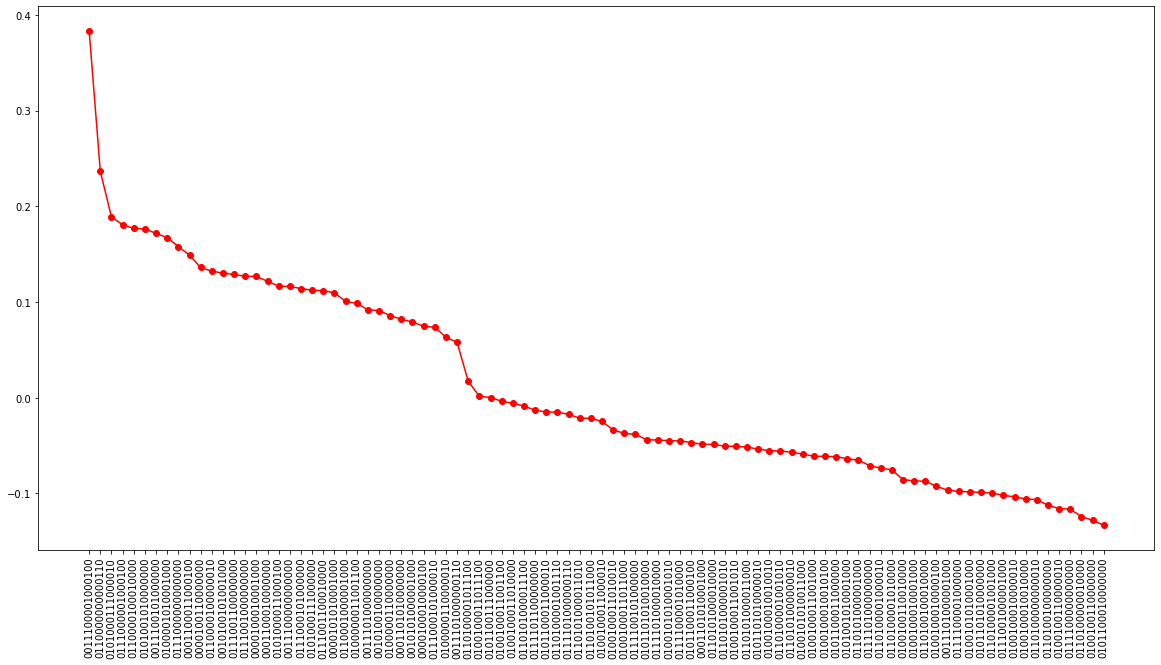

In [141]:
non_null_gt4 = gtrie4[gtrie4['z_n'] != 0]

with open('outputs/gtries_4_table_nn.tex','w') as tf:
    tf.write(non_null_gt4.to_latex(index=False))

plt.xticks(rotation=90)
plt.plot(non_null_gt4['Graph'], non_null_gt4['z_n'], 'ro-', label = 'Subgraph (n=4)')

In [140]:
non_null_gt4

,Graph,Org_Freq,z_score,Rnd_Avg,Rnd_Dev,z_n
0,0011100001000100,170,15.62,20.91,9.54,0.383113
1,0110000000000110,103,9.64,27.88,7.79,0.236441
2,0101000111000010,55,7.70,9.52,5.91,0.188858
3,0111000001000100,54,7.37,14.08,5.42,0.180764
4,0110000100010000,187,7.21,70.13,16.22,0.176840
...,...,...,...,...,...,...
87,0100100110000010,2,-4.72,41.17,8.30,-0.115768
88,0111100000000000,8,-4.75,103.40,20.07,-0.116504
89,0110100000010000,31,-5.06,185.57,30.57,-0.124107
90,0100100110000000,18,-5.22,203.26,35.51,-0.128031


# Modularity

## Empirical Communities


In [278]:
#https://stackoverflow.com/questions/70901680/networkx-create-graphs-from-communities
empirical_communities = [{'Seabirds','Minkle_whale','Common_dolphin','Striped_dolphin', 'Bottlenose_dolphin', 'Harbor_porpoise', 'Tunas', 'Rays'},
 {'Phytoplankton','Discards','Detritus','Import'},
 {'Hake','Squids','Benthic_cephalopods','Horse_mackerel','Blue_jack_mackerel','Chub_mackerel','Mackerel','Demersal_piscivorous_fish','Demersal_invertivorous_fish','Benthopelagic_piscivorous_fish',
  'Benthopelagic_invertivorous_fish','Flatfish','Sparids','Anchovy','Sardine','Bogue','Henslows_crab','Shrimps','Shrimps','Macrozoobenthos','Suprabenthic_invertebrates','Meso_and_Microzooplankton',
  'Macrozooplankton'}]

for c, v_c in enumerate(empirical_communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        H.nodes[v]['empirical_community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in H.edges:
    if H.nodes[v]['empirical_community'] == H.nodes[w]['empirical_community']:
        # Internal edge, mark with community
        H.edges[v, w]['empirical_community'] = H.nodes[v]['empirical_community']
    else:
        # External edge, mark as 0
        H.edges[v, w]['empirical_community'] = 0

<Figure size 80x60 with 0 Axes>

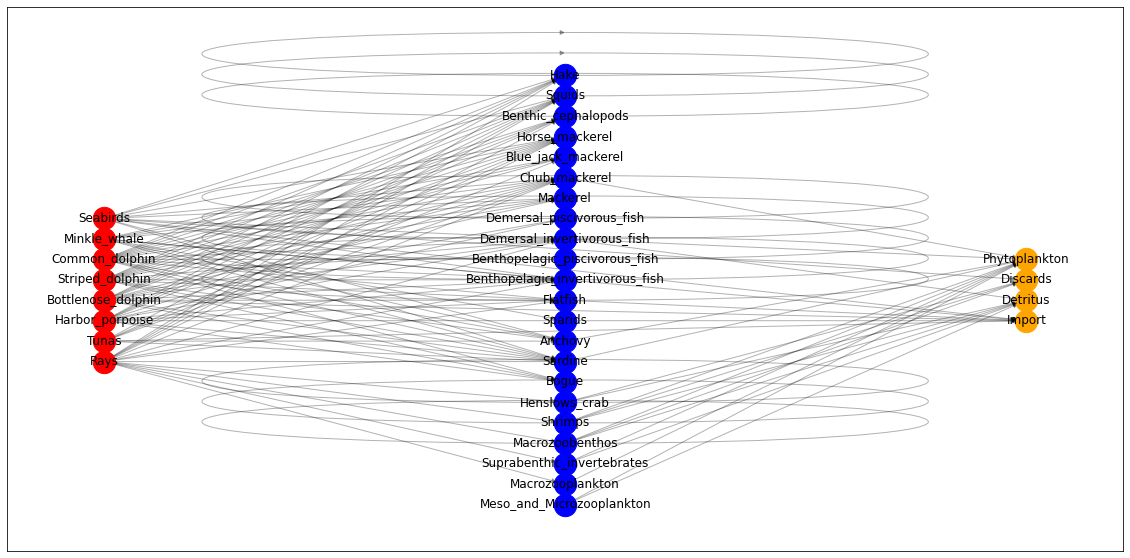

<Figure size 80x60 with 0 Axes>

In [285]:
# Draw the graph, but don't color the nodes
pos = nx.multipartite_layout(H, 'empirical_community')
#nx.draw(H, pos, edge_color='k', with_labels=True, font_weight='light', width= 0.9)
#nx.draw_networkx_nodes(H, pos)

#For each community list, draw the nodes, giving it a specific color.
size = 500
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[0], node_color='r', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[1], node_color='orange', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[2], node_color='b', node_size = size)

nx.draw_networkx_edges(H, pos, alpha = 0.3)
nx.draw_networkx_labels(H, pos)


plt.figure(figsize=(8, 6), dpi=10)

# Louvain modularity

In [207]:
louvain = nx.algorithms.community.louvain_communities(H, seed = 123, resolution=0.9)
print(len(louvain))

5


In [256]:
#https://stackoverflow.com/questions/70901680/networkx-create-graphs-from-communities
communities = sorted(louvain, key=len, reverse=True)

for c, v_c in enumerate(communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        H.nodes[v]['community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in H.edges:
    if H.nodes[v]['community'] == H.nodes[w]['community']:
        # Internal edge, mark with community
        H.edges[v, w]['community'] = H.nodes[v]['community']
    else:
        # External edge, mark as 0
        H.edges[v, w]['community'] = 0

<Figure size 8x6 with 0 Axes>

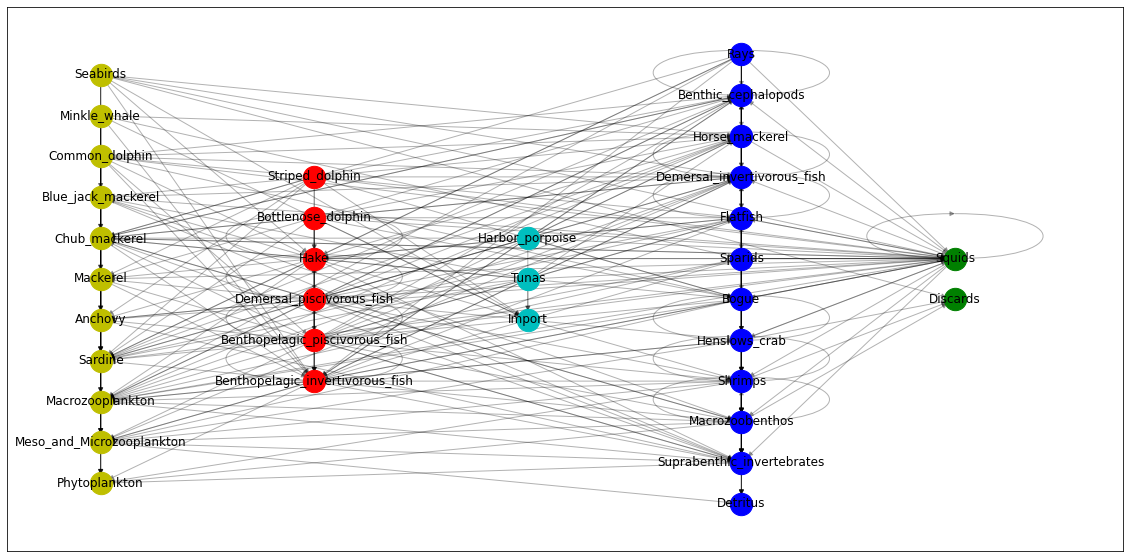

<Figure size 8x6 with 0 Axes>

In [275]:
# Draw the graph, but don't color the nodes
pos = nx.multipartite_layout(H, 'community')
#nx.draw(H, pos, edge_color='k', with_labels=True, font_weight='light', width= 0.9)
#nx.draw_networkx_nodes(H, pos)

#For each community list, draw the nodes, giving it a specific color.
size = 500
nx.draw_networkx_nodes(H, pos, nodelist=louvain[0], node_color='r', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[1], node_color='y', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[2], node_color='g', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[3], node_color='b', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[4], node_color='c', node_size = size)
nx.draw_networkx_edges(H, pos, alpha = 0.3)
nx.draw_networkx_labels(H, pos)


plt.figure(figsize=(8, 6), dpi=1)